In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [6]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

# Check the directory
starting_directory_noe = 'C:/Users/Noe/source/repos/Energy-forecasting-NTNU/data/'
starting_directory_hugo = 'C:\Users\hugob\OneDrive\Documents\ENSE3\3A\lectures\Machine Learning\Project\data'
os.chdir(starting_directory_hugo)
list_directory_tree_with_os_walk('.')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2568213821.py, line 9)

In [5]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [6]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')


In [7]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')


In [8]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [9]:
train_a

,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
...,...,...
34080,2023-04-30 19:00:00,9.02
34081,2023-04-30 20:00:00,0.00
34082,2023-04-30 21:00:00,0.00
34083,2023-04-30 22:00:00,0.00


In [10]:
X_train_observed_a

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.800000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.400024,0.0,0.0,1005.500000,1011.799988,0.0,0.0,82.699997,1018.099976,NaN,0.0,0.0,-0.0,0.0,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
118665,2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.299988,0.0,0.0,1005.400024,1011.700012,0.0,0.0,83.099998,1018.000000,NaN,0.0,0.0,-0.0,0.0,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
118666,2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,1.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.200012,0.0,0.0,1005.299988,1011.599976,0.0,0.0,83.400002,1017.900024,NaN,0.0,0.0,-0.0,0.0,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0
118667,2022-10-21 00:45:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,0.0,0.0,0.0,1.100000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.000000,0.0,0.0,1005.099976,1011.400024,0.0,0.0,83.800003,1017.700012,NaN,0.0,0.0,-0.0,0.0,29.988001,-34.311001,0.0,276.500000,1.1,34062.601562,1.5,-1.0,1.1,-0.0


In [11]:
X_train_observed_a.shape

(118669, 46)

In [12]:
X_train_observed_a.describe()

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,118669,118669.000000,118669.000000,96422.000000,1.186690e+05,118669.000000,110603.000000,118669.000000,118669.000000,118669.000000,1.186690e+05,118669.000000,1.186690e+05,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,2724.0,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000
mean,2021-02-09 23:30:00,6.652576,1.249064,2907.949219,5.994018e+05,166.500381,1737.142212,0.022398,276.823395,44.918282,1.617057e+05,56.611744,2.038025e+05,67.605507,6.0,0.053117,0.004418,0.106243,0.013277,0.026567,0.521391,0.511650,1009.632996,0.006302,0.091018,996.765381,1002.868225,0.187399,0.011914,74.231705,1008.998352,250.0,0.052763,0.0,0.000062,0.091566,179.629486,1.529545,0.059087,280.708557,74.401077,32446.992188,3.043197,0.756781,0.517437,0.000019
min,2019-06-02 22:00:00,0.700000,1.145000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,250.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,932.299988,938.099976,0.000000,0.000000,22.700001,943.900024,250.0,0.000000,0.0,-0.000000,0.000000,0.002000,-50.004002,0.000000,258.899994,0.000000,154.300003,0.000000,-7.300000,-9.300000,-0.000000
25%,2020-04-06 22:45:00,4.400000,1.224000,1102.900024,0.000000e+00,0.000000,590.700012,0.000000,272.100006,0.000000,0.000000e+00,0.000000,0.000000e+00,43.299999,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.099976,0.000000,0.000000,989.299988,995.299988,0.000000,0.000000,65.000000,1001.400024,250.0,0.000000,0.0,0.000000,0.000000,88.487999,-15.066000,0.000000,275.899994,54.799999,15592.400391,1.700000,-1.400000,-0.700000,0.000000
50%,2021-02-09 23:30:00,6.300000,1.247000,1882.400024,3.574770e+04,8.600000,1162.599976,0.000000,277.200012,4.100000,2.481410e+04,0.000000,8.960000e+01,80.500000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1010.700012,0.000000,0.000000,997.900024,1003.900024,0.000000,0.000000,76.699997,1010.000000,250.0,0.000000,0.0,0.000000,0.000000,179.436996,1.202000,0.000000,280.700012,93.699997,36359.800781,2.700000,0.400000,0.500000,0.000000
75%,2021-12-16 00:15:00,8.600000,1.272000,3969.750000,1.037819e+06,288.799988,2079.600098,0.000000,282.000000,76.000000,2.743256e+05,41.799999,1.598314e+05,98.800003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1018.299988,0.000000,0.000000,1005.400024,1011.500000,0.000000,0.000000,85.400002,1017.599976,250.0,0.000000,0.0,0.000000,0.100000,270.640991,18.995001,0.100000,285.200012,99.900002,48084.500000,4.100000,2.700000,1.700000,0.000000
max,2022-10-21 01:00:00,17.500000,1.427000,12328.500000,3.005720e+06,836.400024,11688.700195,1.000000,293.799988,345.700012,1.205498e+06,688.700012,2.451173e+06,100.000000,6.0,15.100000,3.900000,15.100000,7.900000,14.800000,1.000000,1.000000,1044.000000,2.230000,6.000000,1

In [13]:
X_train_observed_a.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

In [14]:
X_train_estimated_a

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.000000,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.000000,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.000000,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.0,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.281,1173.900024,0.0,0.0,536.500000,0.0,272.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.400024,0.0,0.0,79.599998,1013.700012,NaN,0.0,0.0,-0.0,0.1,352.920013,-11.731000,0.1,274.200012,99.900002,11629.299805,3.9,2.9,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1054.199951,0.0,0.0,542.400024,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.299988,0.0,0.0,80.000000,1013.599976,NaN,0.0,0.0,-0.0,0.1,356.634003,-11.884000,0.1,274.200012,100.000000,9923.200195,3.7,2.8,2.4,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.281,1435.800049,0.0,0.0,531.799988,0.0,272.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,1000.900024,1007.200012,0.0,0.0,79.900002,1013.500000,NaN,0.0,0.0,-0.0,0.1,0.352000,-11.928000,0.1,274.200012,99.900002,11230.799805,3.7,2.7,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.281,1817.400024,0.0,0.0,521.200012,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.799988,1007.000000,0.0,0.0,79.800003,1013.299988,NaN,0.0,0.0,-0.0,0.0,4.070000,-11.864000,0.1,274.200012,99.599998,12526.099609,3.8,2.7,2.6,-0.0


<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

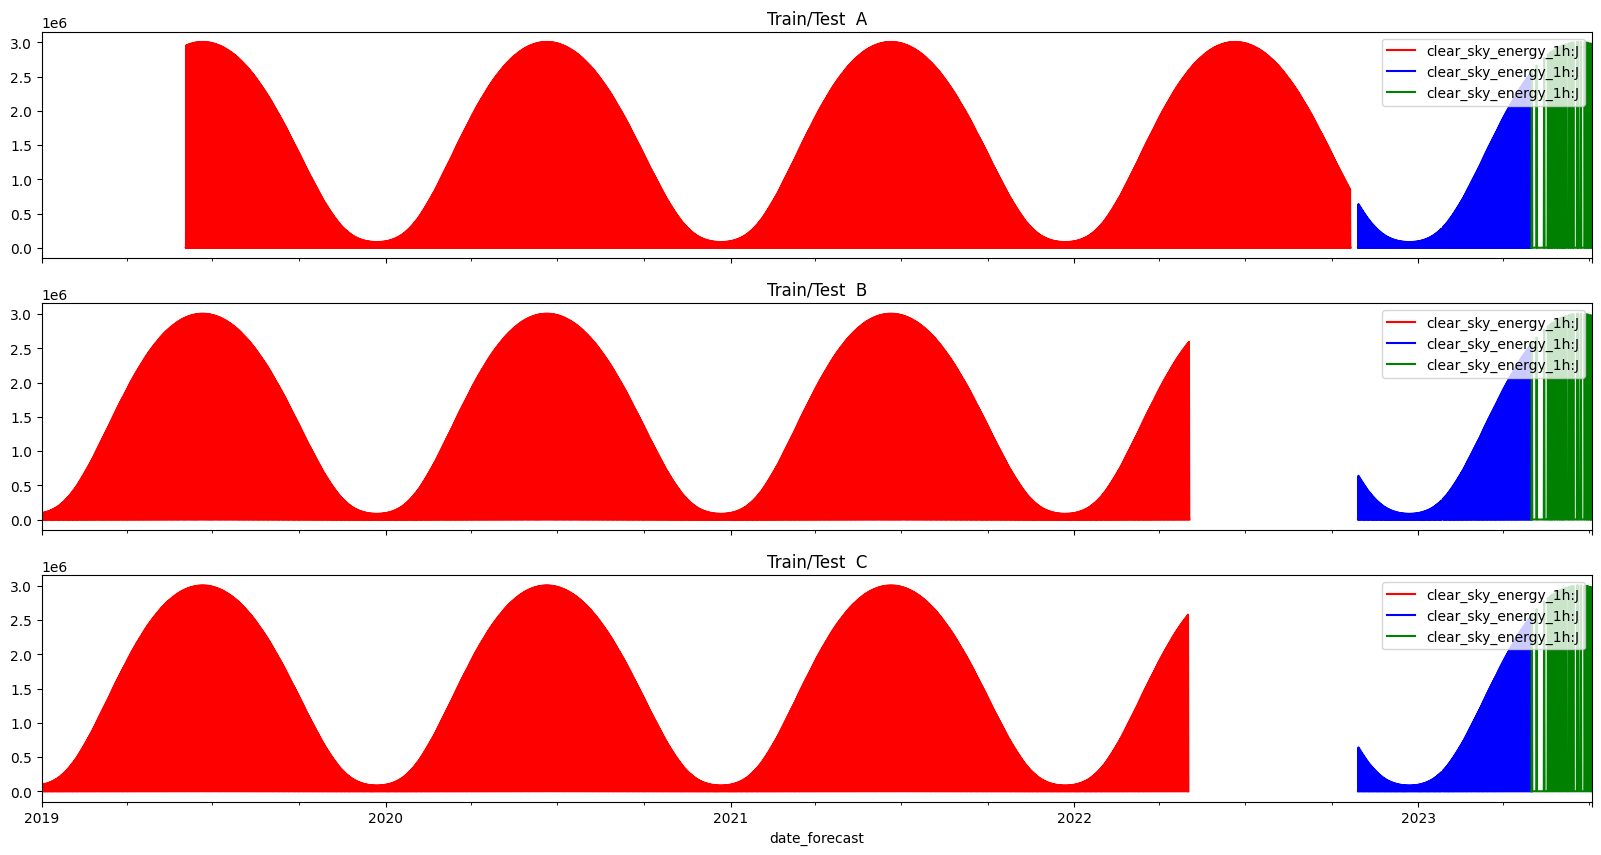

In [15]:
# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'clear_sky_energy_1h:J'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

In [12]:
test = pd.read_csv('test.csv')
test

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [13]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [14]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

In [15]:
test

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.089413,A
1,1,2023-05-01 01:00:00,0.954587,A
2,2,2023-05-01 02:00:00,0.114699,A
3,3,2023-05-01 03:00:00,0.166723,A
4,4,2023-05-01 04:00:00,0.383829,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0.610515,C
2156,2156,2023-07-03 20:00:00,0.267965,C
2157,2157,2023-07-03 21:00:00,0.576212,C
2158,2158,2023-07-03 22:00:00,0.903816,C


### Fill the blank and Nan 

In [16]:
X_train_observed_a.isna().sum() 

date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               22247
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                    8066
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min

In [17]:
X_train_observed_b.isna().sum()

date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               18772
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                    7473
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min

In [18]:
X_train_observed_c.isna().sum()

date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               19923
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                    8512
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min

In [19]:
#Snow_density => too many missing values => Delete this feature
#

X_train_observed_a = X_train_observed_a.drop(columns = 'snow_density:kgm3')
X_train_observed_b = X_train_observed_b.drop(columns = 'snow_density:kgm3')
X_train_observed_c = X_train_observed_c.drop(columns = 'snow_density:kgm3')

X_train_estimated_a = X_train_estimated_a.drop(columns = 'snow_density:kgm3')
X_train_estimated_b = X_train_estimated_b.drop(columns = 'snow_density:kgm3')
X_train_estimated_c = X_train_estimated_c.drop(columns = 'snow_density:kgm3')

X_test_estimated_a = X_test_estimated_a.drop(columns = 'snow_density:kgm3')
X_test_estimated_b = X_test_estimated_b.drop(columns = 'snow_density:kgm3')
X_test_estimated_c = X_test_estimated_c.drop(columns = 'snow_density:kgm3')
    

In [20]:
X_train_observed_a.shape

(118669, 45)

In [21]:
# Imput missing values fill with last valid observation
def fill_nan(Dataframe, feature):
    it_na = np.where(Dataframe[feature].isna())[0]
    
    #If missing value
    if len(it_na != 0):
        #print("Missing data size =",it_na.size," out of", Dataframe.shape[0])
        new_column = Dataframe[feature].fillna(method='ffill')
        method = 'ffill'
        
        if((np.any(new_column.isna()) == True)): 
            method = 'bfill'
            new_column = Dataframe[feature].fillna(method='bfill')
           
        #plt.plot(new_column)
        #plt.scatter(it_na,new_column[it_na],s=10, c='red')
    
        if (np.any(new_column.isna()) == False):
            print("Filled with",method,"method")
            Dataframe[feature] = new_column
        else:
            print("Still Nan values")

In [22]:
nan_feature = ['ceiling_height_agl:m', 'cloud_base_agl:m']

fill_nan(X_train_observed_a, nan_feature[0]), fill_nan(X_train_observed_a, nan_feature[1])
fill_nan(X_train_observed_b, nan_feature[0]), fill_nan(X_train_observed_b, nan_feature[1])
fill_nan(X_train_observed_c, nan_feature[0]), fill_nan(X_train_observed_c, nan_feature[1])

fill_nan(X_train_estimated_a, nan_feature[0]), fill_nan(X_train_estimated_a, nan_feature[1])
fill_nan(X_train_estimated_b, nan_feature[0]), fill_nan(X_train_estimated_b, nan_feature[1])
fill_nan(X_train_estimated_c, nan_feature[0]), fill_nan(X_train_estimated_c, nan_feature[1])

fill_nan(X_test_estimated_a, nan_feature[0]), fill_nan(X_test_estimated_a, nan_feature[1])
fill_nan(X_test_estimated_b, nan_feature[0]), fill_nan(X_test_estimated_b, nan_feature[1])
fill_nan(X_test_estimated_c, nan_feature[0]), fill_nan(X_test_estimated_c, nan_feature[1])


Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with bfill method
Filled with ffill method


C:\Users\NOE\AppData\Local\Temp\ipykernel_5900\154779054.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_column = Dataframe[feature].fillna(method='ffill')
C:\Users\NOE\AppData\Local\Temp\ipykernel_5900\154779054.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_column = Dataframe[feature].fillna(method='bfill')


(None, None)

In [23]:
print(np.any(X_train_observed_a.isna()), np.any(X_train_observed_b.isna()), np.any(X_train_observed_c.isna()),
    np.any(X_train_estimated_a.isna()), np.any(X_train_estimated_b.isna()), np.any(X_train_estimated_c.isna()),
    np.any(X_test_estimated_a.isna()), np.any(X_test_estimated_b.isna()), np.any(X_test_estimated_c.isna())
    )

False False False False False False False False False


### Check correlation between variable

<Axes: >

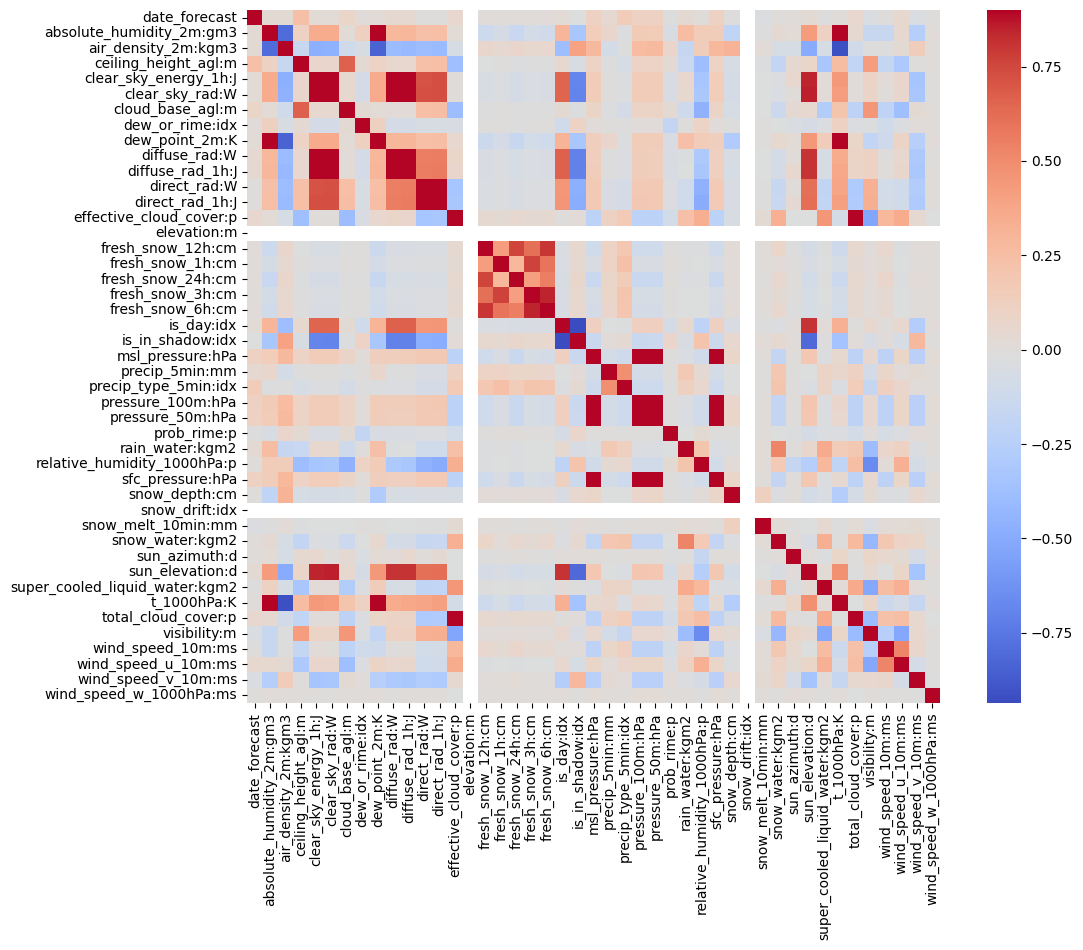

In [29]:
corr_matrix = X_train_observed_a.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True,cmap='coolwarm',fmt='.2f')

In [31]:
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

AttributeError: 'Styler' object has no attribute 'set_precision'

In [32]:
idx = np.where((np.abs(corr_matrix) > 0.95) & (corr_matrix !=1))
print(round(idx[0].shape[0]/2)," strong correlation ==> \n")
columns_corr = []
ind_double = []

for i in range(idx[0].shape[0]):
    if ( ind_double.count((idx[0][i],idx[1][i])) == 0):
        ind_double.append((idx[1][i],idx[0][i]))
        print( 
        "Correlation between : ", 
        X_train_observed_a.columns[idx[0][i]+1], "and", 
        X_train_observed_a.columns[idx[1][i]+1], " = ",
        corr_matrix.iloc[idx[0][i], idx[1][i]], "\n"
        )
        columns_corr.append((X_train_observed_a.columns[idx[0][i]+1],X_train_observed_a.columns[idx[1][i]+1]))

10  strong correlation ==> 

Correlation between :  air_density_2m:kgm3 and diffuse_rad:W  =  0.9748628282981654 

Correlation between :  clear_sky_rad:W and cloud_base_agl:m  =  0.9923317834232241 

Correlation between :  diffuse_rad_1h:J and direct_rad:W  =  0.9869871153005173 

Correlation between :  direct_rad_1h:J and effective_cloud_cover:p  =  0.9852611696388884 

Correlation between :  precip_5min:mm and pressure_50m:hPa  =  0.9997717603345274 

Correlation between :  precip_5min:mm and prob_rime:p  =  0.999914482392545 

Correlation between :  precip_5min:mm and snow_depth:cm  =  0.9999042081912317 

Correlation between :  pressure_50m:hPa and prob_rime:p  =  0.9999178389342016 

Correlation between :  pressure_50m:hPa and snow_depth:cm  =  0.9996884691072808 

Correlation between :  prob_rime:p and snow_depth:cm  =  0.9999182187872183 



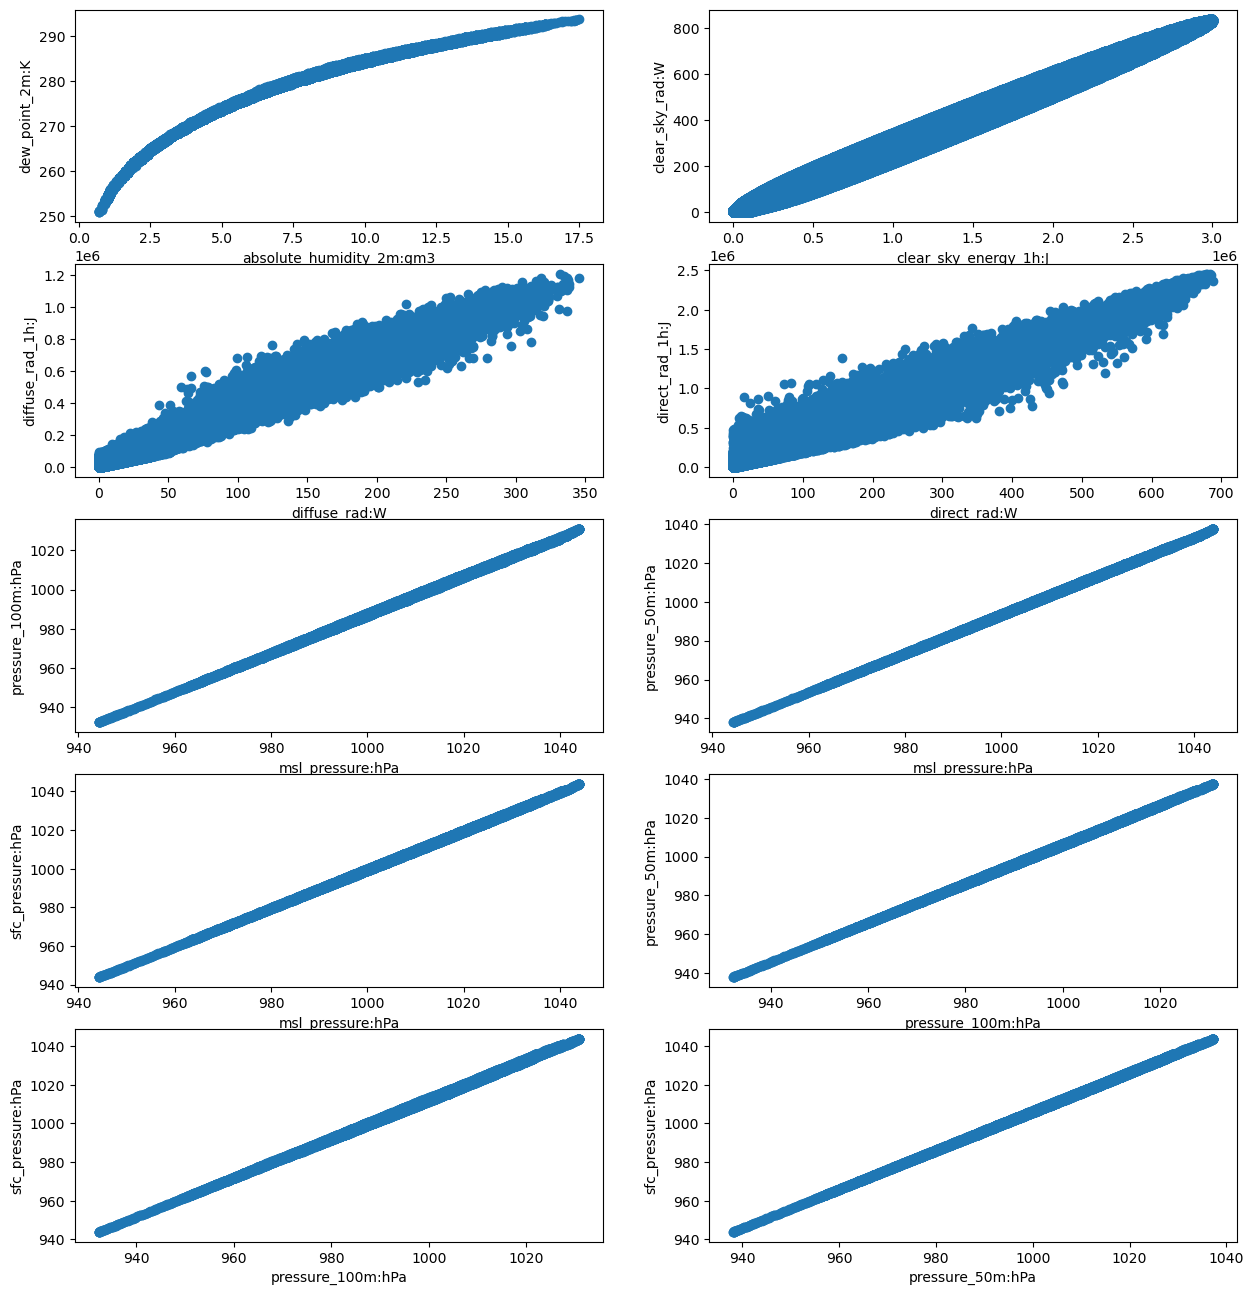

In [29]:
fig, axs = plt.subplots(5,2, figsize=(15,16))
k = 0
for i in range(5):
    for j in range(2):
        axs[i,j].scatter(X_train_observed_a.loc[:,columns_corr[k][0]],X_train_observed_a.loc[:,columns_corr[k][1]])
        axs[i,j].set_xlabel(columns_corr[k][0])
        axs[i,j].set_ylabel(columns_corr[k][1])
        k+=1

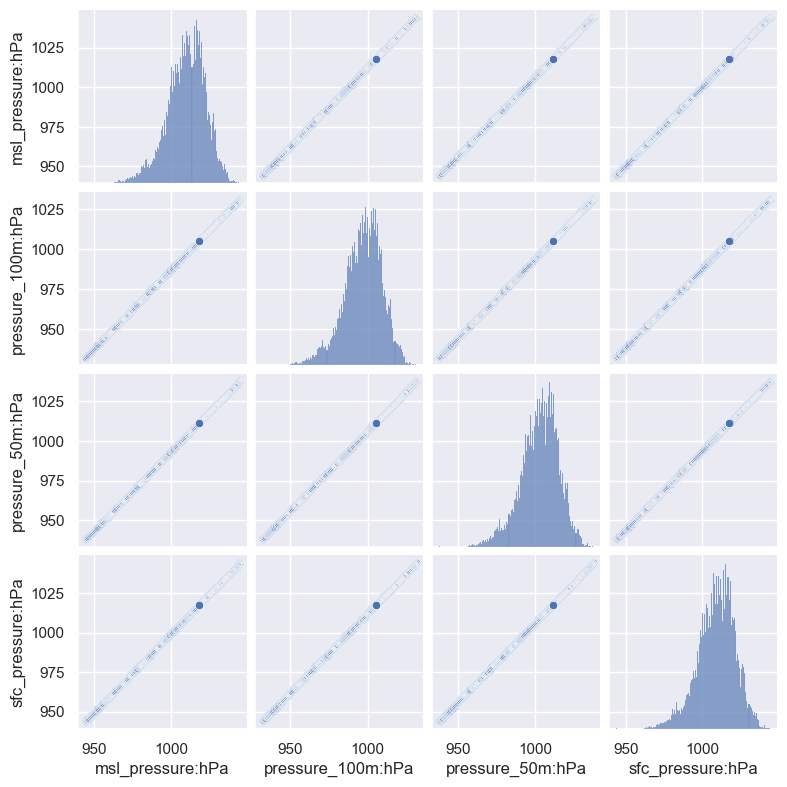

In [30]:
sns.set()
cols_pressure = ['msl_pressure:hPa', 'pressure_100m:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa']
sns.pairplot(X_train_observed_a[cols_pressure], height = 2)

In [27]:
#Check if it's the same for estimated dataset

corr_matrix = X_train_estimated_a.corr()
idx = np.where((np.abs(corr_matrix) > 0.95) & (corr_matrix !=1))
print(round(idx[0].shape[0]/2)," strong correlation ==> \n")
columns_corr = []
ind_double = []

for i in range(idx[0].shape[0]):
    if ( ind_double.count((idx[0][i],idx[1][i])) == 0):
        ind_double.append((idx[1][i],idx[0][i]))
        print( 
        "Correlation between : ", 
        X_train_estimated_a.columns[idx[0][i]+2], "and", 
        X_train_estimated_a.columns[idx[1][i]+2], " = ",
        corr_matrix.iloc[idx[0][i], idx[1][i]], "\n"
        )
        columns_corr.append((X_train_estimated_a.columns[idx[0][i]+2],X_train_estimated_a.columns[idx[1][i]+2]))

11  strong correlation ==> 

Correlation between :  absolute_humidity_2m:gm3 and dew_point_2m:K  =  0.9825923925578672 

Correlation between :  clear_sky_energy_1h:J and clear_sky_rad:W  =  0.9905489999326903 

Correlation between :  diffuse_rad:W and diffuse_rad_1h:J  =  0.9866227765332353 

Correlation between :  direct_rad:W and direct_rad_1h:J  =  0.9875649117141303 

Correlation between :  effective_cloud_cover:p and total_cloud_cover:p  =  0.9516523750949986 

Correlation between :  msl_pressure:hPa and pressure_100m:hPa  =  0.9998758721314741 

Correlation between :  msl_pressure:hPa and pressure_50m:hPa  =  0.9999438546226465 

Correlation between :  msl_pressure:hPa and sfc_pressure:hPa  =  0.9999413147545335 

Correlation between :  pressure_100m:hPa and pressure_50m:hPa  =  0.9999607448099789 

Correlation between :  pressure_100m:hPa and sfc_pressure:hPa  =  0.9998568597141421 

Correlation between :  pressure_50m:hPa and sfc_pressure:hPa  =  0.9999616602250426 



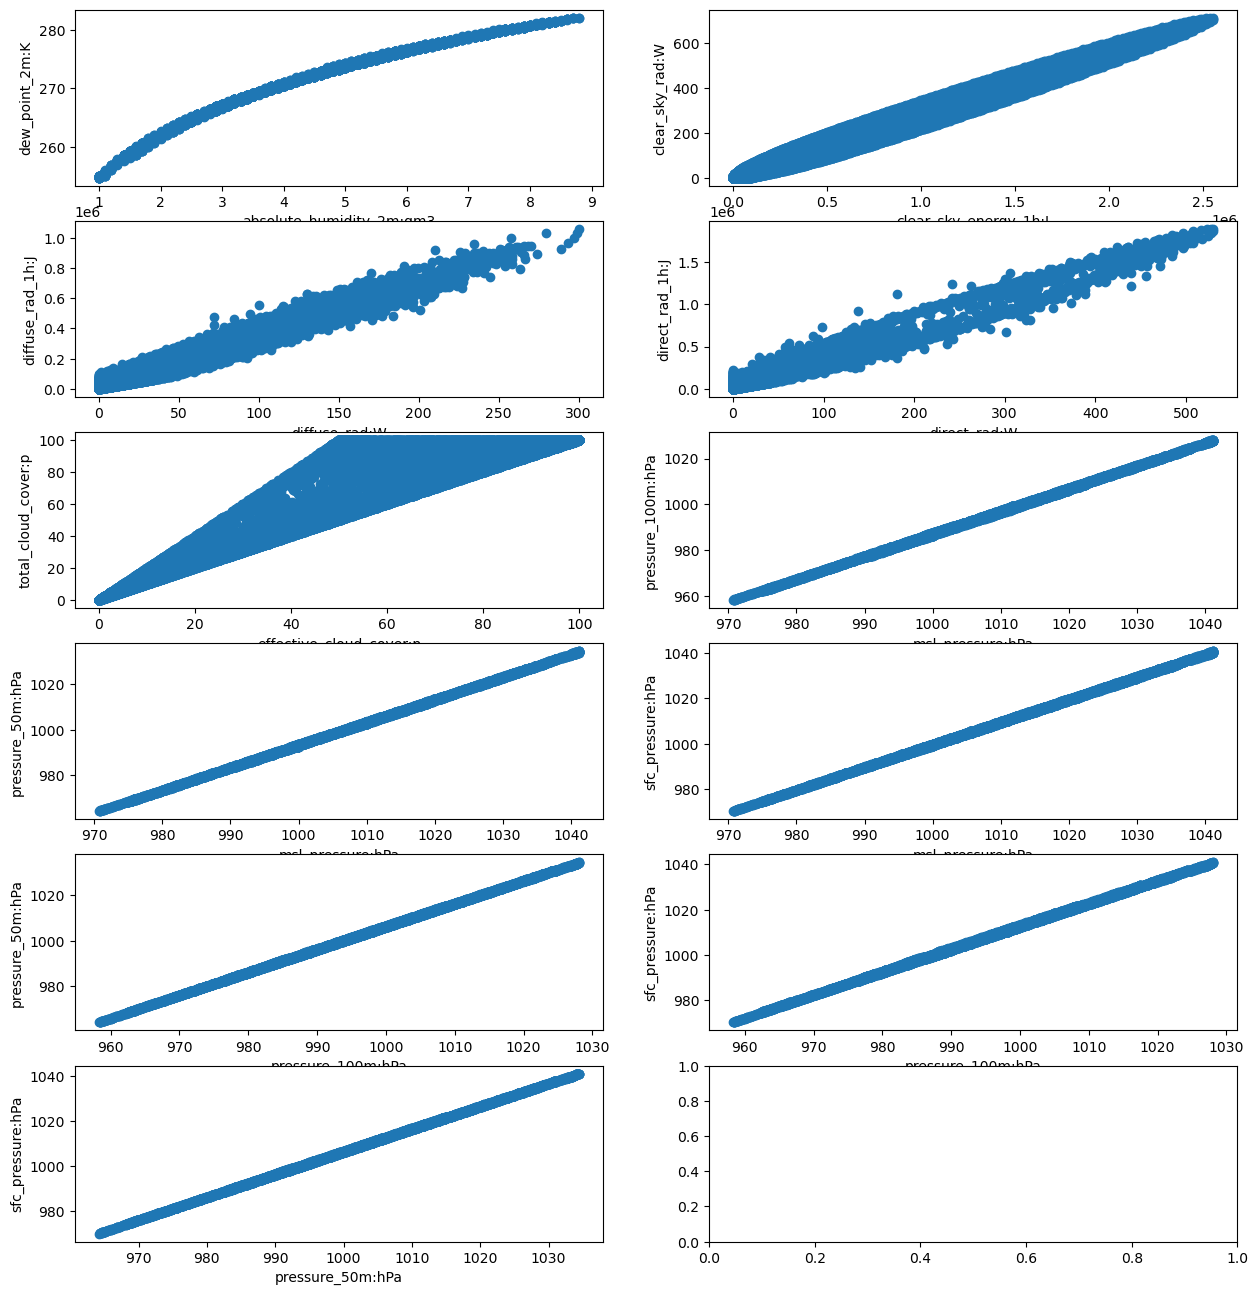

In [28]:
fig, axs = plt.subplots(6,2, figsize=(15,16))
k = 0
for i in range(6):
    for j in range(2):
        if (i != 5 or j!=1):
            axs[i,j].scatter(X_train_estimated_a.loc[:,columns_corr[k][0]],X_train_estimated_a.loc[:,columns_corr[k][1]])
            axs[i,j].set_xlabel(columns_corr[k][0])
            axs[i,j].set_ylabel(columns_corr[k][1])
            k+=1

In [29]:
# because of strong correlation we can drop some columns
columns_to_delete = ['msl_pressure:hPa','pressure_50m:hPa','sfc_pressure:hPa','diffuse_rad_1h:J', 'clear_sky_energy_1h:J']
X_train_observed_a = X_train_observed_a.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_train_observed_b = X_train_observed_b.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_train_observed_c = X_train_observed_c.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])

X_train_estimated_a = X_train_estimated_a.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_train_estimated_b = X_train_estimated_b.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_train_estimated_c = X_train_estimated_c.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])

X_test_estimated_a = X_test_estimated_a.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_test_estimated_b = X_test_estimated_b.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_test_estimated_c = X_test_estimated_c.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])


In [30]:
X_train_observed_a.shape

(118669, 40)

In [31]:
#Check for outliers

In [38]:
X_train_observed_a.columns[1]

'absolute_humidity_2m:gm3'